Q 1: Take any data from the internet and form a supervised machine learning problem around it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pandas.plotting import autocorrelation_plot

In [3]:
# time series components
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
# dickey-fuller test, acf, pacf
from statsmodels.tsa.stattools import adfuller,acf,pacf

In [5]:
# arima model
from statsmodels.tsa.arima_model import ARIMA

In [6]:
# Reading the file 
cr=pd.read_csv(r"F:\Phython/mrf.csv")

In [7]:
cr.head(2)

,Month,Open Price,High Price,Low Price,Close Price,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,Jan-06,2780.0,2895.5,2670.0,2811.60,39623,3358,109309329,27061,68.30,225.5,31.60
1,Feb-06,2820.0,3399.0,2800.0,3056.45,77350,8001,242294622,42901,55.46,599.0,236.45


In [8]:
# create the proper date format
d1=pd.date_range(start="1/1/2006", end="31/5/2016",  freq="M")
cr['tdate'] = d1
cr.head(2)

,Month,Open Price,High Price,Low Price,Close Price,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,tdate
0,Jan-06,2780.0,2895.5,2670.0,2811.60,39623,3358,109309329,27061,68.30,225.5,31.60,2006-01-31
1,Feb-06,2820.0,3399.0,2800.0,3056.45,77350,8001,242294622,42901,55.46,599.0,236.45,2006-02-28


In [9]:
cr.columns

Index(['Month', 'Open Price', 'High Price', 'Low Price', 'Close Price',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open', 'tdate'],
      dtype='object')

In [10]:
# to forecast, we require only 2 columns: date, column to predict
mystock = cr[['tdate','Close Price']]
mystock.head()
mystock.dtypes

mystock = mystock.set_index('tdate')
mystock.head(2)

,Close Price
tdate,
2006-01-31,2811.60
2006-02-28,3056.45


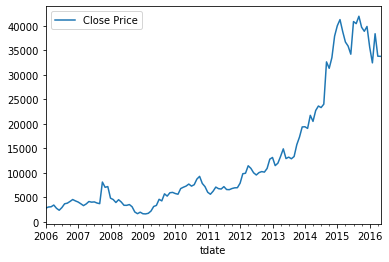

In [11]:
# plot the trend
mystock.plot()

Q 2: What is the difference between a dataframe and a series? What are the different types of datatypes present in Pandas?

Series:
A Series is a one-dimensional object that can hold any data type such as integers, floats and strings. The axis labels are collectively called index. Series cannot contains the multiple columns. in addition, tuples, list, and dictionary can be easily converted into series, using the "series" method. 
A pandas Series can be created using the following constructor −
pandas.Series( data, index, dtype, copy)

Dataframe:
Dataframe is 2-dimensional labeled data structure, with a columns of same or different types. Dataframe is generally getting used in the pandas object. Like Series, DataFrame accepts many different kinds of inputs, such as:
Dict of 1D ndarrays, lists, dicts, or Series
Structured or record ndarray
A Series

Different types of datatypes present in pandas are:
Object
int64
float64
bool
datetime64
timedeltans[64]

Q 3: Explain all the metrics which I have written codes about. For example, explain what did you infer from the code                                  

df.describe(): 
Describe metrics is used to view the statistical information of a model, a data frame or a series, such as a percentile, mean, std, etc. Moreover, describe metrics returns the output such as the syntax of the model, various parameters of the model, a string such as a percentile, return type, mean. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types. 

df.info(): 
The info() function is used to print the short summary of DataFrame. In addition, this function prints the information about the DataFrame including the various parameters such as index dtype and column dtypes, non-null values, null counts, data types, list of all columns with their data types and memory usage. 

df.shape():
The shape(), size() function are used to return the size, shape, and dimensions of data frames and series. The shape() function returns the size of dataframe /series which is equivalent to the total number of elements. That is rows x columns. The size() function returns the tuple of shape (rows, columns) of dataframe/series.

Q 4: Analyze the mean temperature data which be attached with the files on Github

In [12]:
# Reading the file 
cr=pd.read_csv(r"F:\Phython/test_DailyDelhiClimateTest.csv")

In [13]:
cr

,date,meantemp
0,01-01-2017,15.913043
1,02-01-2017,18.500000
2,03-01-2017,17.111111
3,04-01-2017,18.700000
4,05-01-2017,18.388889
...,...,...
109,20-04-2017,34.500000
110,21-04-2017,34.250000
111,22-04-2017,32.900000
112,23-04-2017,32.875000


In [14]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
date        114 non-null object
meantemp    114 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [15]:
cr.describe()

,meantemp
count,114.000000
mean,21.713079
std,6.360072
min,11.000000
25%,16.437198
50%,19.875000
75%,27.705357
max,34.500000


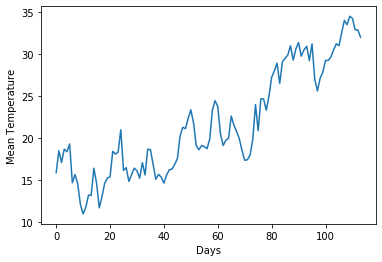

In [16]:
plt.xlabel('Days')
plt.ylabel('Mean Temperature')
plt.plot(cr.meantemp)

In [18]:
type(cr)

pandas.core.frame.DataFrame

In [20]:
cr.iloc[:,:] 

,date,meantemp
0,01-01-2017,15.913043
1,02-01-2017,18.500000
2,03-01-2017,17.111111
3,04-01-2017,18.700000
4,05-01-2017,18.388889
...,...,...
109,20-04-2017,34.500000
110,21-04-2017,34.250000
111,22-04-2017,32.900000
112,23-04-2017,32.875000


In [68]:
cr.rank()

,date,meantemp
0,1.0,24.0
1,5.0,44.0
2,9.0,35.0
3,13.0,48.5
4,17.0,42.0
...,...,...
109,80.0,114.0
110,84.0,113.0
111,88.0,110.0
112,92.0,109.0
